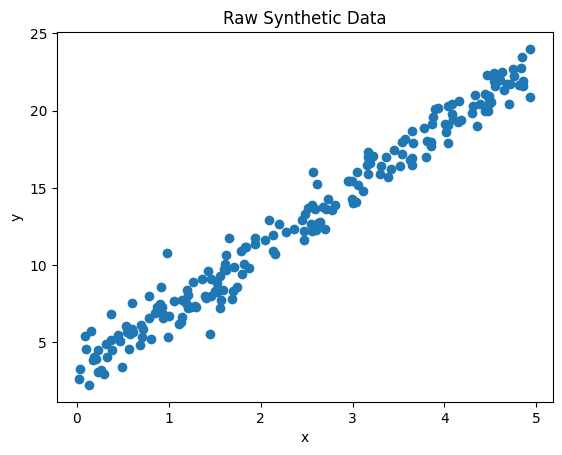

Closed-form Solution:
Intercept: 3.1052011509608217
Slope: 3.9843857863650083

Gradient Descent Solution:
Intercept: 3.1052011509363893
Slope: 3.9843857863726124


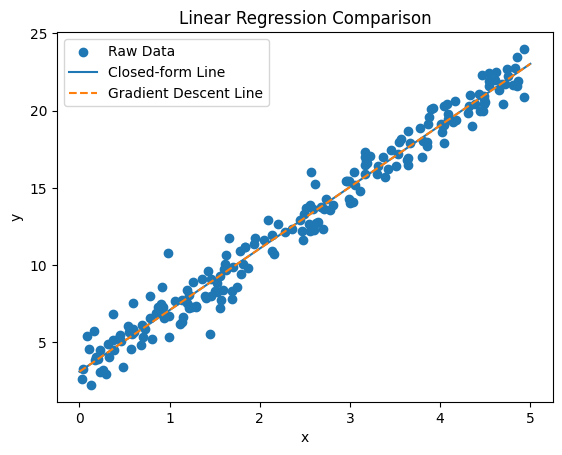

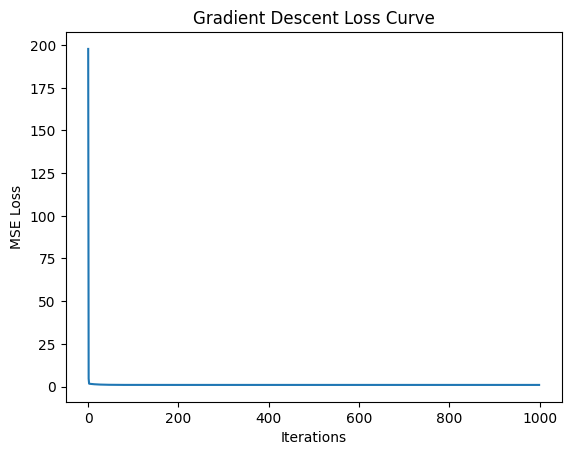

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Reproducibility
np.random.seed(42)

# Generate data
m = 200
X = np.random.uniform(0, 5, m)
noise = np.random.normal(0, 1, m)
y = 3 + 4 * X + noise

# Add bias column
X_b = np.c_[np.ones(m), X]

# Plot raw data
plt.figure()
plt.scatter(X, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Raw Synthetic Data")
plt.show()

# Closed-form solution
theta_closed = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

b_closed = theta_closed[0]
w_closed = theta_closed[1]

print("Closed-form Solution:")
print("Intercept:", b_closed)
print("Slope:", w_closed)

# Predictions
x_line = np.linspace(0, 5, 100)
y_closed = b_closed + w_closed * x_line

# Gradient Descent
theta = np.zeros(2)
eta = 0.05
iterations = 1000
losses = []

for _ in range(iterations):
    y_pred = X_b @ theta
    error = y_pred - y
    mse = np.mean(error ** 2)
    losses.append(mse)

    gradients = (2 / m) * X_b.T @ error
    theta -= eta * gradients

b_gd = theta[0]
w_gd = theta[1]

print("\nGradient Descent Solution:")
print("Intercept:", b_gd)
print("Slope:", w_gd)

y_gd = b_gd + w_gd * x_line

# Plot Fitted Lines (Comparison)
plt.figure()
plt.scatter(X, y, label="Raw Data")
plt.plot(x_line, y_closed, label="Closed-form Line")
plt.plot(x_line, y_gd, linestyle="--", label="Gradient Descent Line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression Comparison")
plt.show()

# Loss Curve (Gradient Descent)
plt.figure()
plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.title("Gradient Descent Loss Curve")
plt.show()
